In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/content/drive/MyDrive/신입기수 프로젝트/Dataset')

In [ ]:
df = pd.read_csv('rawdata.csv')

In [ ]:
df_arima = df[['날짜', '청담대교_유량', '청담대교_수위', '잠수교_유량', '잠수교_수위', '한강대교_유량', '한강대교_수위', '행주대교_유량', '행주대교_수위']]
df_arima

,날짜,청담대교_유량,청담대교_수위,잠수교_유량,잠수교_수위,한강대교_유량,한강대교_수위,행주대교_유량,행주대교_수위
0,2012-05-01 00:00,469.05,310.7,0.0,300.2,729.80,290.0,540.18,275.3
1,2012-05-01 00:10,498.00,314.7,0.0,300.2,731.48,290.0,540.18,275.3
2,2012-05-01 00:20,490.68,313.7,0.0,301.2,726.42,290.0,540.18,275.3
3,2012-05-01 00:30,476.21,311.7,0.0,301.2,726.42,290.0,552.17,276.3
4,2012-05-01 00:40,476.21,311.7,0.0,301.2,707.17,291.0,564.29,277.3
...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,319.84,0.0,NaN,0.0,-456.41,0.0,974.40,0.0
276332,2022-07-18 23:20,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88,0.0
276333,2022-07-18 23:30,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0
276334,2022-07-18 23:40,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46,0.0


In [ ]:
# 인덱스 알려달라는데 왜 이것만 나와 --

nanIndex1 = df_arima[df_arima[['청담대교_수위', '잠수교_수위', '한강대교_수위', '행주대교_유량', '행주대교_수위']].isnull()].index

In [ ]:
nanIndex1

RangeIndex(start=0, stop=276336, step=1)

In [ ]:
# 59개 결측치 인덱스 겹치는지 '손수' 확인하기
# 청담대교 수위

df_arima[df_arima['청담대교_수위'].isnull()]

,날짜,청담대교_유량,청담대교_수위,잠수교_유량,잠수교_수위,한강대교_유량,한강대교_수위,행주대교_유량,행주대교_수위
140613,2017-06-26 11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140614,2017-06-26 11:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140615,2017-06-26 11:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140616,2017-06-26 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140617,2017-06-26 12:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140618,2017-06-26 12:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140619,2017-06-26 12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140620,2017-06-26 12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140621,2017-06-26 12:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140622,2017-06-26 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 잠수교 수위

df_arima[df_arima['잠수교_수위'].isnull()]

,날짜,청담대교_유량,청담대교_수위,잠수교_유량,잠수교_수위,한강대교_유량,한강대교_수위,행주대교_유량,행주대교_수위
140613,2017-06-26 11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140614,2017-06-26 11:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140615,2017-06-26 11:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140616,2017-06-26 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140617,2017-06-26 12:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140618,2017-06-26 12:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140619,2017-06-26 12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140620,2017-06-26 12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140621,2017-06-26 12:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140622,2017-06-26 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 한강대교 수위
df_arima[df_arima['잠수교_수위'].isnull()]

,날짜,청담대교_유량,청담대교_수위,잠수교_유량,잠수교_수위,한강대교_유량,한강대교_수위,행주대교_유량,행주대교_수위
140613,2017-06-26 11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140614,2017-06-26 11:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140615,2017-06-26 11:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140616,2017-06-26 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140617,2017-06-26 12:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140618,2017-06-26 12:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140619,2017-06-26 12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140620,2017-06-26 12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140621,2017-06-26 12:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140622,2017-06-26 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_arima

,날짜,청담대교_유량,청담대교_수위,잠수교_유량,잠수교_수위,한강대교_유량,한강대교_수위,행주대교_유량,행주대교_수위
0,2012-05-01 00:00,469.05,310.7,0.0,300.2,729.80,290.0,540.18,275.3
1,2012-05-01 00:10,498.00,314.7,0.0,300.2,731.48,290.0,540.18,275.3
2,2012-05-01 00:20,490.68,313.7,0.0,301.2,726.42,290.0,540.18,275.3
3,2012-05-01 00:30,476.21,311.7,0.0,301.2,726.42,290.0,552.17,276.3
4,2012-05-01 00:40,476.21,311.7,0.0,301.2,707.17,291.0,564.29,277.3
...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,319.84,0.0,NaN,0.0,-456.41,0.0,974.40,0.0
276332,2022-07-18 23:20,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88,0.0
276333,2022-07-18 23:30,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0
276334,2022-07-18 23:40,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46,0.0


In [ ]:
consecutive = list(range(140613,140671))
unconsecutive = [236080]

In [ ]:
# unconsecutive - 보간
unconsecutive2 = [236079, 236080, 236081]
df_arima.loc[unconsecutive2, ['청담대교_수위', '잠수교_수위', '한강대교_수위', '행주대교_유량', '행주대교_수위']] = df_arima.loc[unconsecutive2, ['청담대교_수위', '잠수교_수위', '한강대교_수위', '행주대교_유량', '행주대교_수위']].interpolate(axis = 0)
df_arima.loc[unconsecutive2, :]

# 한강대교, 청담대교 유량은 따로 합칠 거임

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,날짜,청담대교_유량,청담대교_수위,잠수교_유량,잠수교_수위,한강대교_유량,한강대교_수위,행주대교_유량,행주대교_수위
236079,2020-10-15 10:30,520.3,317.7,NaN,330.2,473.29,312.0,762.23,292.3
236080,2020-10-15 10:40,NaN,316.2,NaN,328.2,NaN,310.0,748.16,291.3
236081,2020-10-15 10:50,498.0,314.7,NaN,326.2,505.24,308.0,734.09,290.3


### Arima - 원래 그래프 (432일 전후 출력)

In [ ]:
col = ['청담대교_수위', '잠수교_수위', '한강대교_수위', '행주대교_유량', '행주대교_수위']

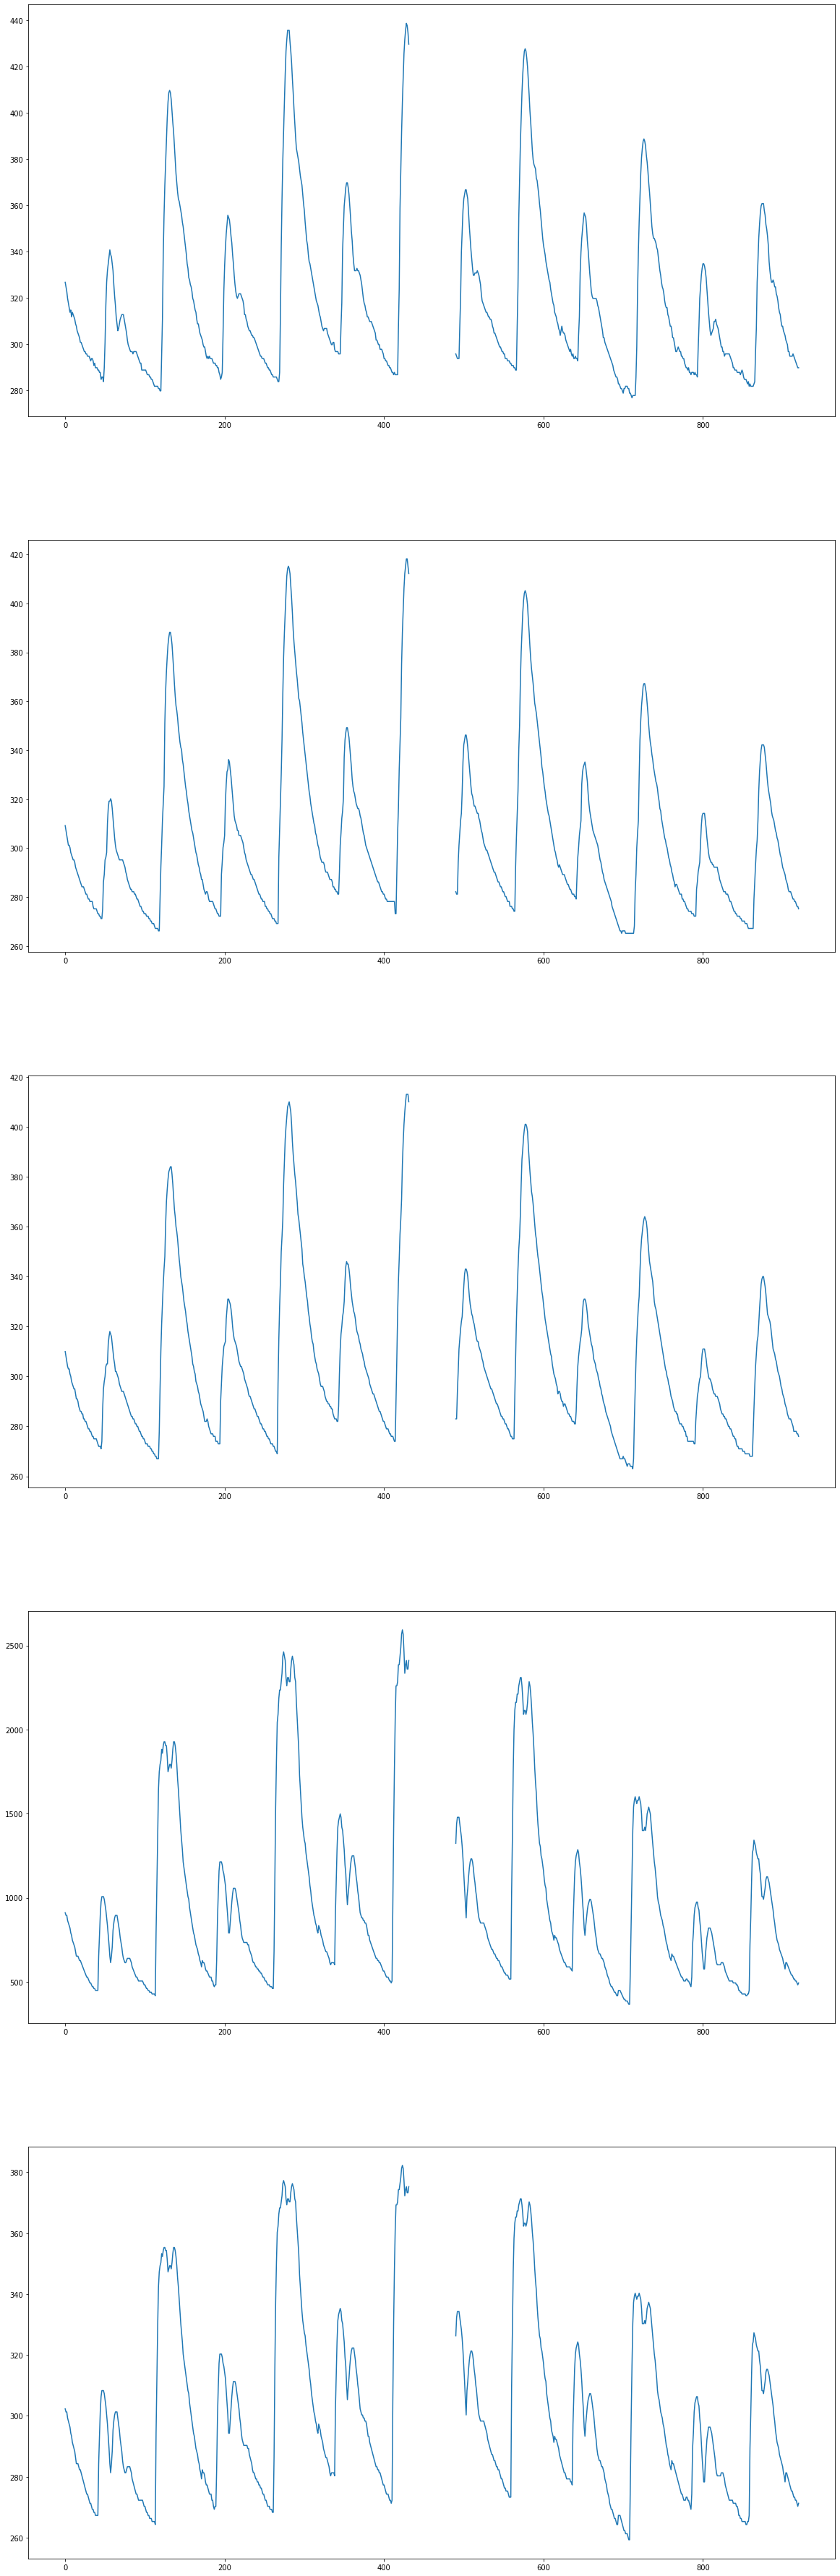

In [ ]:
f, axes = plt.subplots(len(col), 1)
f.set_size_inches((20, 65))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(len(col)):

    start = consecutive[0]-432
    end = consecutive[-1]+432
    x = range(len(df_arima['날짜'][start:end]))
    y = df_arima[col[i]][start:end]
    axes[i].plot(x, y)

plt.show()

### arima - 주기 432

In [ ]:
# !pip3 uninstall pmdarima --yes
# !conda install pmdarima --yes

Found existing installation: pmdarima 2.0.0
Uninstalling pmdarima-2.0.0:
  Successfully uninstalled pmdarima-2.0.0


In [ ]:
# !pip3 install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pmdarima-2.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.8 MB)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm


n = 432
for i in col:
    start = consecutive[0]
    model = pm.auto_arima(df_arima[i][start-n:start], seasonal = True)
    df_arima[i].loc[consecutive] = model.predict(len(consecutive))

### 저장

In [1]:
df_arima

NameError: ignored